# Actividad 3: Sistemas Simples 1D
## Mecánica Cuántica
Diego Rodríguez  
A01570204

In [1]:
using SymPy
using Plots
# Plots.theme(:vibrant)
Plots.theme(:juno)

### 2.5 A particle in the infinite square well has its initial wave function an even mixture of the first two stationary states: $$\psi(x,0)=A\left[\psi_1(x)+\psi_2(x)\right]$$

#### a) Normalize $\psi(x,0)$

The function states for an infinite well are given by the following expression
$$\psi_n(x)=\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right)$$
Where $a$ is the width of said well. Because of the normalization property, we have the following
$$\int_{\mathbb{R}}\left|A\left[\psi_1(x)+\psi_2(x)\right]\right|^2dx=1$$
$$\Rightarrow A^2\int_{\mathbb{R}}\left|\left[\sqrt{\frac{2}{a}}\sin\left(\frac{\pi x}{a}\right)+\sqrt{\frac{2}{a}}\sin\left(\frac{2\pi x}{a}\right)\right]\right|^2dx=1$$
We can solve for $A$ and then start computing the integral
$$\Rightarrow \left(\sqrt{\frac{2}{a}}\right)^2\int_{\mathbb{R}}\left[\sin\left(\frac{\pi x}{a}\right)+\sin\left(\frac{2\pi x}{a}\right)\right]^2dx=\frac{1}{A^2}$$
$$\Rightarrow \frac{2}{a}\int_{\mathbb{R}}\sin^2\left(\frac{\pi x}{a}\right)+2\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)+\sin^2\left(\frac{2\pi x}{a}\right)dx=\frac{1}{A^2}$$
But $\phi_n$ states are orthogonal, and in fact the sine function has an orthogonal property:
$$\int_0^{2\pi}\sin nx\sin mxdx=\pi\delta_{mn}$$
Because it is periodic. However, changing the limits:
$$\int_0^\pi\sin nx\sin mxdx=\frac{\pi}{2}\delta_{mn}$$
And furthermore
$$\int_0^1\sin(nx\pi)\sin(mx\pi)dx=\frac{1}{2}\delta_{mn}$$
Which leads to
$$\int_0^a\sin\left(\frac{n\pi x}{a}\right)\sin\left(\frac{m\pi x}{a}\right)dx=\frac{a}{2}\delta_{mn}$$
We then evaluate and find $A$
$$\Rightarrow \frac{2}{a}\left(\frac{a}{2}+0+\frac{a}{2}\right)=\frac{1}{A^2}$$
$$\Rightarrow \frac{2}{a}\left(a\right)=\frac{1}{A^2}$$
$$\Rightarrow 2=\frac{1}{A^2}$$
$$\therefore\boxed{A=\frac{1}{\sqrt{2}}}$$

In [2]:
# Defining variables
x = symbols("x",real=true)
a = symbols("a",real=true,positive=true)
ψ5(x,n) = √(2/a)*sin((n*PI*x)/a)
# Computing integral
A=1/√(integrate(abs2(ψ5(x,1)+ψ5(x,2)),(x,0,a)))

  ___
\/ 2 
-----
  2  

#### b) Find $\psi(x,t)$ and $\left|\psi(x,t)\right|^2$. Express the latter as a sinusoidal function of time, as in Example 2.1. To simplify the result, let $\displaystyle\omega\equiv\frac{\pi^2\hbar}{2ma^2}$

The time evolution of $\psi$ is given as a sum of the states multiplied by their respective constant $c_n$ and their phase:
$$\psi(x,t)=\sum_{n=1}^\infty c_n\psi_n(x)e^{-iE_nt/\hbar}$$
We could calculate the $c_n$ factors, which will only be $c_1$ and $c_2$, or we could just look back to $\psi(x,0)$. Is is expressed as a sum of a coefficient, $A$, and the function states, $\phi_n$. So we can conclude that the $c_n$ coefficient is not only the same for $\phi_1$ and $\phi_2$, but it is $\displaystyle A=\frac{1}{\sqrt{2}}$. So we only need to find the complex exponential phase for time. Remembering the Energy in such a system (infinite well) is given for each state as
$$E_n=\frac{\hbar^2n^2\pi^2}{2ma^2}$$
We finally get the expression for $\psi(x,t)$ as follows:
$$\psi(x,t)=\frac{1}{\sqrt{a}}\left[\sin\left(\frac{\pi x}{a}\right)\exp\left(-i\frac{\hbar1^2\pi^2t}{2ma^2}\right)+\sin\left(\frac{2\pi x}{a}\right)\exp\left(-i\frac{\hbar 2^2\pi^2t}{2ma^2}\right)\right]$$
Using the $\omega$ substitution suggested on the problem we end up with
$$\therefore\boxed{\psi(x,t)=\frac{1}{\sqrt{a}}\left[\sin\left(\frac{\pi x}{a}\right)e^{-i\omega t}+\sin\left(\frac{2\pi x}{a}\right)e^{-i4\omega t}\right]}$$

Now we calculate the modulus for $\psi$, remembering that it is a complex number and
$$|z|=zz^*$$
So we would have
$$|\psi(x,t)|^2=\left|\frac{1}{\sqrt{2}}\sqrt{\frac{2}{a}}\sin\left(\frac{\pi x}{a}\right)e^{-i\omega t}+\frac{1}{\sqrt{2}}\sqrt{\frac{2}{a}}\sin\left(\frac{2\pi x}{a}\right)e^{-i4\omega t}\right|^2$$
$$|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1e^{-i\omega t}+\psi_2e^{-i4\omega t}\right]\left[\psi_1^*e^{i\omega t}+\psi_2^*e^{i4\omega t}\right]$$
But $\psi_1$ and $\psi_2$ are real, i.e. $\psi_n^*=\psi_n$, so:
$$|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1e^{-i\omega t}\psi_1e^{i\omega t}+\psi_2e^{-i4\omega t}\psi_2e^{i4\omega t}+\psi_1e^{-i\omega t}\psi_2e^{i4\omega t}+\psi_1e^{i\omega t}\psi_2e^{-i4\omega t}\right]$$
$$|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1^2+\psi_2^2+\psi_1\psi_2e^{i3\omega t}+\psi_1\psi_2e^{-i3\omega t}\right]$$
Remembering cosine identity
$$\cos\theta=\frac{e^{i\theta}+e^{-i\theta}}{2}$$
We have
$$\therefore\boxed{|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1^2+\psi_2^2+2\psi_1\psi_2\cos(3\omega t)\right]}$$
In expanded version:
$$\therefore\boxed{|\psi(x,t)|^2=\frac{1}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{1}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t)}$$

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
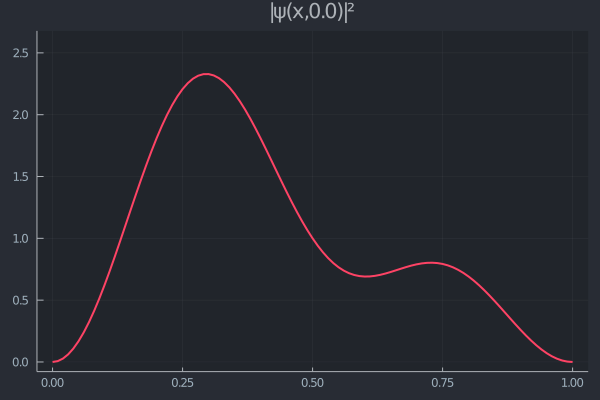

In [3]:
gr()
t = 0
Ψ5t(s) = (sin(π*s))^2+(sin(2*π*s))^2+sin(π*s)*sin(2*π*s)*cos(3*2*π*t)
s = collect(0:0.01:1)
anim = @animate for i = 0:π/300:0.333
    t = i
    y = Ψ5t.(s)
    plot(s,y, legend=false,ylims=[0,2.6],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|²"))
end
gif(anim, "psi_time.gif", fps = 15)

#### c) Compute $\langle x\rangle$. Notice that it oscillates in time. What is the angular frequency of the oscillation? What is the amplitude of the oscillation? (If your amplitude is greater than $a/2$ go directly to jail.)

This is calculated as
$$\langle x\rangle=\int_0^a\psi^*x\psi dx=\int_0^ax|\psi(x,t)|^2$$
Because $x$ is a commutative operator
$$\Rightarrow\langle x\rangle=\int_0^ax\left[\frac{1}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{1}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t)\right]dx$$
$$\Rightarrow\langle x\rangle=\int_0^a\frac{x}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{x}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t)dx$$
$$\Rightarrow\langle x\rangle=\int_0^a\frac{x}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{x}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t)dx$$
$$\Rightarrow\langle x\rangle=\int_0^a\frac{x}{a}\sin^2\left(\frac{\pi x}{a}\right)dx+\int_0^a\frac{x}{a}\sin^2\left(\frac{2\pi x}{a}\right)dx+\int_0^a\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t)dx$$
$$\Rightarrow\langle x\rangle=\frac{1}{2}\langle x\rangle_1+\frac{1}{2}\langle x\rangle_2+\cos(3\omega t)\int_0^a\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)dx$$
Actually, in general we could see the expected value of $x$ as:
$$\langle x\rangle=\sum_{n=1}c_n^2\langle x\rangle_{\phi_n}+Int$$
Where $Int$ is the interference amplitude, i.e. the interference between the different states.

Sadly for us, the rightmost integral won't add up to zero, we do have to computate it. Luckily for us, there's sympy for that:

In [4]:
ω,t = symbols("omega,t",real=true)
integrate((2*x/a)*(sin(PI*x/a))*(sin(2*PI*x/a)),(x,0,a))

-16*a 
------
    2 
9*pi  

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
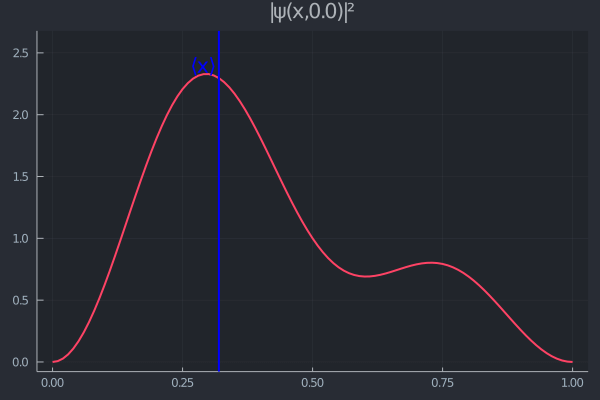

In [5]:
gr()
t = 0
Ψ5t(s) = (sin(π*s))^2+(sin(2*π*s))^2+sin(π*s)*sin(2*π*s)*cos(3*2*π*t)
Exx5(t) = 1/2-(16*cos(3*2π*t))/(9*π^2)
s = collect(0:0.01:1)
anim = @animate for i = 0:π/300:0.325
    t = i
    y = Ψ5t.(s)
    z = 
    plot(s,y, legend=false,ylims=[0,2.6],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|²"))
    vline!([Exx5(t)], line = (:blue, 2))
    annotate!(Exx5(t)-0.03,2.4,"⟨x⟩",:blue)
end
gif(anim, "psi_time.gif", fps = 15)

For the expected value of $x$ in any of the $\psi_n$ states in the infinite well, we always get $0.5a$. This can be easily seen with the symmetry of the functions, which are sine functions. So we have
$$\langle x\rangle=\frac{1}{2}\cdot\frac{a}{2}+\frac{1}{2}\cdot\frac{a}{2}-\frac{16a\cos(3\omega t)}{9\pi^2}$$
$$\therefore\boxed{\langle x\rangle=\frac{a}{2}-\frac{16a\cos(3\omega t)}{9\pi^2}}$$
Notice the expected value for $x$ is oscillating through time due to the cosine function of $t$.

#### d) Compute $\langle p\rangle$

Because we have the general expectation value for $x$, dependent on time, we can calculate the expectation value of $p$ by applying the time derivative to the expectation value of $x$:
$$\langle p\rangle = m\frac{d}{dt}\langle x\rangle$$
$$\Rightarrow\langle p\rangle = m\frac{d}{dt}\left[\frac{a}{2}-\frac{16a\cos(3\omega t)}{9\pi^2}\right]$$
$$\Rightarrow\langle p\rangle = m\left[3\omega\cdot\frac{16a\cos(3\omega t)}{9\pi^2}\right]$$
$$\therefore\boxed{\langle p\rangle = \frac{16am\omega\cos(3\omega t)}{3\pi^2}}$$

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
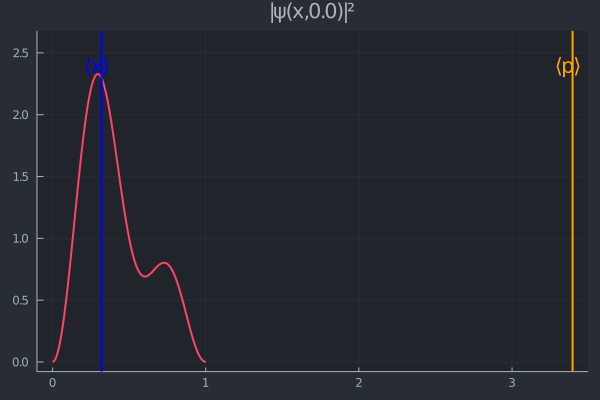

In [6]:
gr()
t = 0
Ψ5t(s) = (sin(π*s))^2+(sin(2*π*s))^2+sin(π*s)*sin(2*π*s)*cos(3*2*π*t)
Exx5(t) = 1/2-(16*cos(3*2π*t))/(9*π^2)
Exp5(t) = (16*2*π*cos(3*2π*t))/(3*π^2)
s = collect(0:0.01:1)
anim = @animate for i = 0:π/300:0.325
    t = i
    y = Ψ5t.(s)
    z = 
    plot(s,y, legend=false,ylims=[0,2.6],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|²"))
    vline!([Exx5(t)], line = (:blue, 2))
    annotate!(Exx5(t)-0.03,2.4,"⟨x⟩",:blue)
    vline!([Exp5(t)], line = (:orange, 2))
    annotate!(Exp5(t)-0.03,2.4,"⟨p⟩",:orange)
end
gif(anim, "psi_time.gif", fps = 15)

#### e) If you measured the energy of this particle, what values might you get, and what is the probability of getting each of them? Find the expectation value of $H$. How does it compare with $E_1$ and $E_2$?

The probabilities for measuring each Energy are given as $\mathcal{P}(E_n)=\mathcal{P}(\phi_n)=c_n^2$. We already have the $c_n$ coefficients, so:
$$\mathcal{P}(E_1)=\mathcal{P}(E_2)=\frac{1}{2}$$
The expected value of $H$ could be calculated as
$$\langle H\rangle=\langle\psi|H|\psi\rangle$$
But we don't have time for that do we? It's easier to calculate it using the probabilities for the $E_n$ we have already found. The expected value of $H$ would be:
$$\langle H\rangle=\sum_{n=1}^\infty E_n\mathcal{P}(E_n)$$
So we have:
$$\langle H\rangle=E_1\mathcal{P}(E_1)+E_2\mathcal{P}(E_2)$$
Remembering the energies are given by
$$E_n=\frac{\hbar^2n^2\pi^2}{2ma^2}$$
We simplify:
$$\Rightarrow\langle H\rangle=\frac{\hbar^21^2\pi^2}{2ma^2}\cdot\frac{1}{2}+\frac{\hbar^22^2\pi^2}{2ma^2}\cdot\frac{1}{2}$$
$$\Rightarrow\langle H\rangle=\frac{\hbar^2\pi^2+4\hbar^2\pi^2}{4ma^2}$$
$$\therefore\boxed{\langle H\rangle=\frac{5\hbar^2\pi^2}{4ma^2}=\frac{5\omega\hbar}{2}}$$

### 2.6 Although the overall phase constant of the wave function is of no physical significance (it cancels out whenever you calculate a measurable quantity), the _relative_ phase of the coefficients in Equation 2.17 does matter. For example, suppose we change the relative phase of $\psi_1$ and $\psi_2$ in problem 2.5: $$\psi(x,0)=A\left[\psi_1(x)+e^{i\phi}\psi_2(x)\right]$$ where $\phi$ is some constant. Find $\psi(x,t),|\psi(x,t)|^2$ and $\langle x\rangle$, and compare your results with what you got before. Study the special cases $\displaystyle\phi=\frac{\pi}{2}$ and $\phi=\pi$.

Now for $|\psi|^2$ we get:
$$|\psi|^2=\psi^*\psi=A^2\left[\psi_1+\psi_2e^{-i\phi}\right]\left[\psi_1+\psi_2e^{i\phi}\right]$$
$$\Rightarrow|\psi|^2=A^2\left(\psi_1^2+\psi_1\psi_2e^{-i\phi}+\psi_1\psi_2e^{i\phi}+\psi_2^2e^{-i\phi+i\phi}\right)$$
$$\Rightarrow|\psi|^2=A^2\left(\psi_1^2+\psi_1\psi_2\left(e^{-i\phi}+e^{i\phi}\right)+\psi_2^2\right)$$
But $(e^{i\phi})^*=e^{-i\phi}$ and $z+z^*=2\mathcal{R}(z)$, so
$$\Rightarrow|\psi|^2=A^2\left(\psi_1^2+2\psi_1\psi_2\cos\phi+\psi_2^2\right)$$
Which can seem a bit troubling, since it is different from our previous value. However, the important thing is the integral across the whole space. And the middle term, just as before, will be 0. This is because the $\cos\phi$ factor doesn't depend on $x$, so we can leave it out of the integral and we have the same integral of sines with different frequencies, that will give 0 because of their orthogonality properties. Thus, the value of $A$ will stay the same. And with the energy again given by:
$$E_n=\frac{\hbar^2n^2\pi^2}{2ma^2}$$
The expression for $\psi(x,t)$ is as follows:
$$\psi(x,t)=\frac{1}{\sqrt{a}}\left[\sin\left(\frac{\pi x}{a}\right)\exp\left(-i\frac{\hbar1^2\pi^2t}{2ma^2}\right)+\sin\left(\frac{2\pi x}{a}\right)\exp\left(-i\frac{\hbar 2^2\pi^2t}{2ma^2}+i\phi\right)\right]$$
Using the $\omega$ substitution suggested on the problem we end up with
$$\therefore\boxed{\psi(x,t)=\frac{1}{\sqrt{a}}\left[\sin\left(\frac{\pi x}{a}\right)e^{-i\omega t}+\sin\left(\frac{2\pi x}{a}\right)e^{-i4\omega t+i\phi}\right]}$$

Now for the magnitude of that:
$$|\psi(x,t)|^2=\left|\frac{1}{\sqrt{2}}\sqrt{\frac{2}{a}}\sin\left(\frac{\pi x}{a}\right)e^{-i\omega t}+\frac{1}{\sqrt{2}}\sqrt{\frac{2}{a}}\sin\left(\frac{2\pi x}{a}\right)e^{-i4\omega t+i\phi}\right|^2$$
$$|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1e^{-i\omega t}+\psi_2e^{-i4\omega t+i\phi}\right]\left[\psi_1^*e^{i\omega t}+\psi_2^*e^{i4\omega t-i\phi}\right]$$
But $\psi_1$ and $\psi_2$ are real, i.e. $\psi_n^*=\psi_n$, so:
$$|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1e^{-i\omega t}\psi_1e^{i\omega t}+\psi_2e^{-i4\omega t+i\phi}\psi_2e^{i4\omega t-i\phi}+\psi_1e^{-i\omega t}\psi_2e^{i4\omega t-i\phi}+\psi_1e^{i\omega t}\psi_2e^{-i4\omega t+i\phi}\right]$$
$$|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1^2+\psi_2^2+\psi_1\psi_2e^{i3(\omega t-\phi)}+\psi_1\psi_2e^{-i3(\omega t-\phi)}\right]$$
Remembering cosine identity
$$\cos\theta=\frac{e^{i\theta}+e^{-i\theta}}{2}$$
We have
$$\therefore\boxed{|\psi(x,t)|^2=\frac{1}{2}\left[\psi_1^2+\psi_2^2+2\psi_1\psi_2\cos(3\omega t-\phi)\right]}$$
In expanded version:
$$\therefore\boxed{|\psi(x,t)|^2=\frac{1}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{1}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t-\phi)}$$

Podemos ver que solo tiene un cambio de fase de $\phi$ en la oscilación.

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
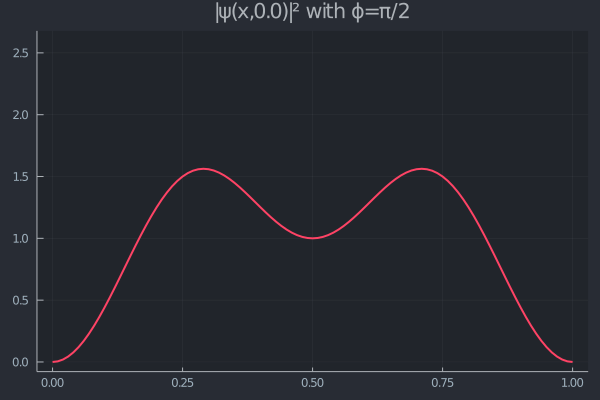

In [7]:
gr()
t = 0
θ = π/2
Ψ5t(s) = (sin(π*s))^2+(sin(2*π*s))^2+sin(π*s)*sin(2*π*s)*cos(3*2*π*t+θ)
s = collect(0:0.01:1)
anim = @animate for i = 0:π/300:0.333
    t = i
    y = Ψ5t.(s)
    plot(s,y, legend=false,ylims=[0,2.6],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|² with ϕ=π/2"))
end
gif(anim, "psi_time.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
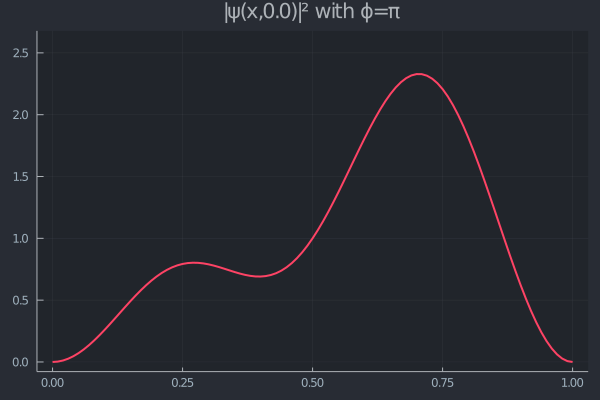

In [8]:
gr()
t = 0
θ = π
Ψ5t(s) = (sin(π*s))^2+(sin(2*π*s))^2+sin(π*s)*sin(2*π*s)*cos(3*2*π*t+θ)
s = collect(0:0.01:1)
anim = @animate for i = 0:π/300:0.333
    t = i
    y = Ψ5t.(s)
    plot(s,y, legend=false,ylims=[0,2.6],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|² with ϕ=π"))
end
gif(anim, "psi_time.gif", fps = 15)

From the animations we can see there is only a difference in the phase. For example, with $\phi=\pi/2$ the graph starts in the middle of both states, while at $\phi=\pi$ it starts on the other end (right peak). Now we calculate the expectation for $x$.

This is calculated as
$$\langle x\rangle=\int_0^a\psi^*x\psi dx=\int_0^ax|\psi(x,t)|^2$$
Because $x$ is a commutative operator
$$\Rightarrow\langle x\rangle=\int_0^ax\left[\frac{1}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{1}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t-\phi)\right]dx$$
$$\Rightarrow\langle x\rangle=\int_0^a\frac{x}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{x}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t-\phi)dx$$
$$\Rightarrow\langle x\rangle=\int_0^a\frac{x}{a}\sin^2\left(\frac{\pi x}{a}\right)+\frac{x}{a}\sin^2\left(\frac{2\pi x}{a}\right)+\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t-\phi)dx$$
$$\Rightarrow\langle x\rangle=\int_0^a\frac{x}{a}\sin^2\left(\frac{\pi x}{a}\right)dx+\int_0^a\frac{x}{a}\sin^2\left(\frac{2\pi x}{a}\right)dx+\int_0^a\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)\cos(3\omega t-\phi)dx$$
$$\Rightarrow\langle x\rangle=\frac{1}{2}\langle x\rangle_1+\frac{1}{2}\langle x\rangle_2+\cos(3\omega t-\phi)\int_0^a\frac{2x}{a}\sin\left(\frac{\pi x}{a}\right)\sin\left(\frac{2\pi x}{a}\right)dx$$
We use again SymPy:

In [47]:
integrate((2*x/a)*(sin(PI*x/a))*(sin(2*PI*x/a)),(x,0,a))

-16*a 
------
    2 
9*pi  

For the expected value of $x$ in any of the $\psi_n$ states in the infinite well, we always get $0.5a$. This can be easily seen with the symmetry of the functions, which are sine functions. So we have
$$\langle x\rangle=\frac{1}{2}\cdot\frac{a}{2}+\frac{1}{2}\cdot\frac{a}{2}-\frac{16a\cos(3\omega t-\phi)}{9\pi^2}$$
$$\therefore\boxed{\langle x\rangle=\frac{a}{2}-\frac{16a\cos(3\omega t-\phi)}{9\pi^2}}$$
Notice the expected value for $x$ is oscillating through time due to the cosine function of $t$.

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
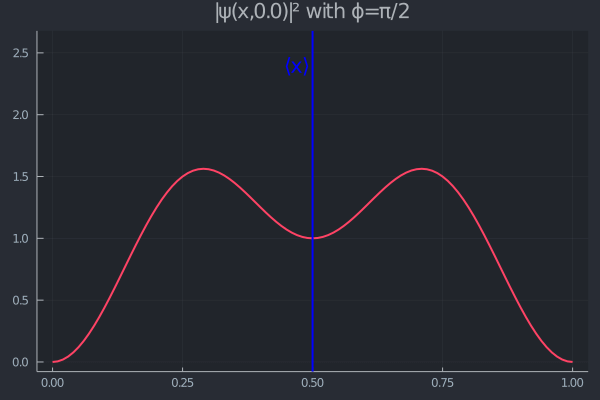

In [9]:
gr()
t = 0
θ=π/2
Ψ5t(s) = (sin(π*s))^2+(sin(2*π*s))^2+sin(π*s)*sin(2*π*s)*cos(3*2*π*t-θ)
Exx5(t) = 1/2-(16*cos(3*2π*t-θ))/(9*π^2)
s = collect(0:0.01:1)
anim = @animate for i = 0:π/300:0.325
    t = i
    y = Ψ5t.(s)
    z = 
    plot(s,y, legend=false,ylims=[0,2.6],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|² with ϕ=π/2"))
    vline!([Exx5(t)], line = (:blue, 2))
    annotate!(Exx5(t)-0.03,2.4,"⟨x⟩",:blue)
end
gif(anim, "psi_time.gif", fps = 15)

Once again, the shape of the graphs on its own isn't changed, but the time at which the oscillation happens is altered. With $\pi/2$ we start on the middle and with $\pi$ we start on the other (right) side.

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
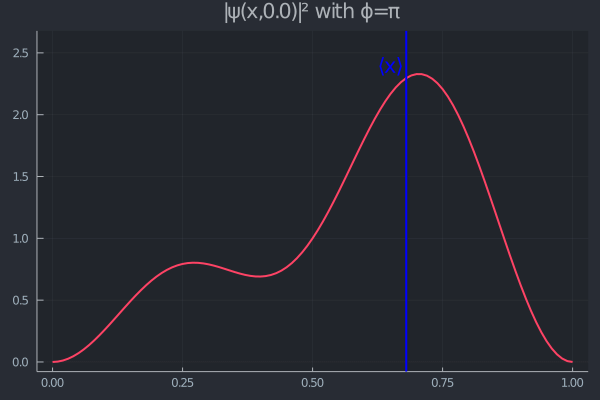

In [10]:
gr()
t = 0
θ=π
Ψ5t(s) = (sin(π*s))^2+(sin(2*π*s))^2+sin(π*s)*sin(2*π*s)*cos(3*2*π*t-θ)
Exx5(t) = 1/2-(16*cos(3*2π*t-θ))/(9*π^2)
s = collect(0:0.01:1)
anim = @animate for i = 0:π/300:0.325
    t = i
    y = Ψ5t.(s)
    z = 
    plot(s,y, legend=false,ylims=[0,2.6],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|² with ϕ=π"))
    vline!([Exx5(t)], line = (:blue, 2))
    annotate!(Exx5(t)-0.03,2.4,"⟨x⟩",:blue)
end
gif(anim, "psi_time.gif", fps = 15)

### 2.7 A particle in the infinite square well has the initial wave function $$\psi(x,0)=\begin{cases}Ax&0\leq x\leq \frac{a}{2}\\ A(a-x)&\frac{a}{2}\leq x\leq a\end{cases}$$

#### a) Sketch $\psi(x,0)$ and determine the constant $A$.

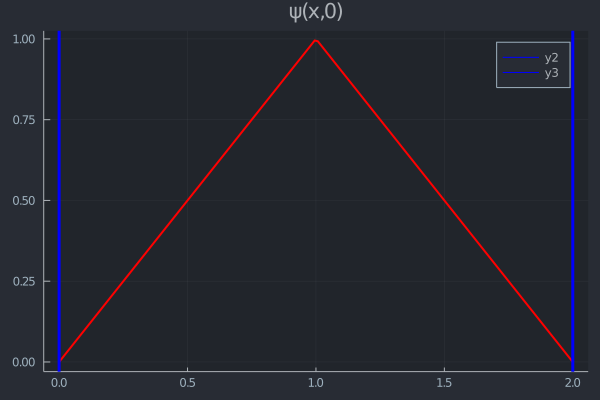

In [77]:
# Heaviside Function
H(s) = 0.5 * (sign(s)+1)
# Triangle Function
Λ(s) = H(s+1) * H(-(s-1)) * (1-abs(s))
an = 1
ψ07(s) = Λ(s-an)
plot(ψ07,title = "ψ(x,0)",-0,2,label = "",line=(2,:red))
vline!([0],line=(3,:blue))
vline!([2],line=(3,:blue))

It must satisfy a normalization condition:
$$\int_{0}^{a/2}(Ax)^2dx+\int_{a/2}^{a}[A(a-x)]^2dx=1$$
We use SymPy

In [12]:
A7 = √(1/(integrate(x^2,(x,0,a/2))+integrate((a-x)^2,(x,a/2,a))))

    ___
2*\/ 3 
-------
   3/2 
  a    

It can also be noted that, because of the symmetry along the $x=a/2$ line, we could rewrite the integral as:
$$2\int_{0}^{a/2}(Ax)^2dx=1$$

#### b) Find $\psi(x,t)$

Before even attempting to do the calculations necessary for this, we can note a few things. First of all, due to the boundary conditions, the solutions will only have sine forms. If considered with respect to the center at $x=a/2$, the funciton is symmetric. Also along these lines, the sine modes with half periods will be symmetric, aka odd modes, but the ones with full period, aka even modes, won't. Asymmetric functions cannot build a symmetric function, so we know from the beginning $c_{2n}=0$. Now, to the maths:

We know already that
$$\psi_n=\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right)$$
And to get the $c_n$ coefficients:
$$c_n=\langle\psi_n|\psi(x,0)\rangle$$
So we have:
$$\int_0^a\psi_n^*\psi(x,0)dx$$
We can still use the symmetry:
$$2\int_0^{a/2}\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right)Axdx$$

In [13]:
n = symbols("n",real=true,positive=true,integer=true)
simplify(2*integrate(√(2/a)*sin(n*PI*x/a)*A7*x,(x,0,a/2)))

    ___ /          /pi*n\        /pi*n\\
2*\/ 6 *|- pi*n*cos|----| + 2*sin|----||
        \          \ 2  /        \ 2  //
----------------------------------------
                   2  2                 
                 pi *n                  

From this we remember only odd modes are available. In which case, the cosine term becomes zero and we get:
$$c_n=\frac{4\sqrt{6}}{\pi^2n^2}\sin\left(\frac{n\pi}{2}\right)$$
Finally we can have $\psi(x,t)$
$$\psi(x,t)=\sum_{n=1}^\infty\frac{4\sqrt{6}}{\pi^2n^2}\sin\left(\frac{n\pi}{2}\right)\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right)e^{-i\omega n^2t}$$
Podemos simplificar esto. Si vemos el seno para los valores de $n$ sería $1,0,-1,0,1,-1,\dots$. Por lo que podemos escribir la expresión como:
$$\therefore\boxed{\psi(x,t)=\sum_{n=1}^\infty\frac{8\sqrt{3}}{\pi^2n^2\sqrt{a}}\mathcal{R}[(i)^{n-1}]\sin\left(\frac{n\pi x}{a}\right)e^{-i\omega n^2t}}$$
De esta forma, para las potencias pares tendríamos $i$ o $-i$ y el resultado daría cero, por lo que no tendríamos que especificar en la suma.

┌ Info: Saved animation to 
│   fn = C:\Users\diego\Desktop\Bachelor Engineering Physics\6° Semestre\1° Parcial\Mecánica Cuántica\Tareas\Tarea 03\psi_time.gif
└ @ Plots C:\Users\diego\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\diego\\Desktop\\Bachelor Engineering Physics\\6° Semestre\\1° Parcial\\Mecánica Cuántica\\Tareas\\Tarea 03\\psi_time.gif")
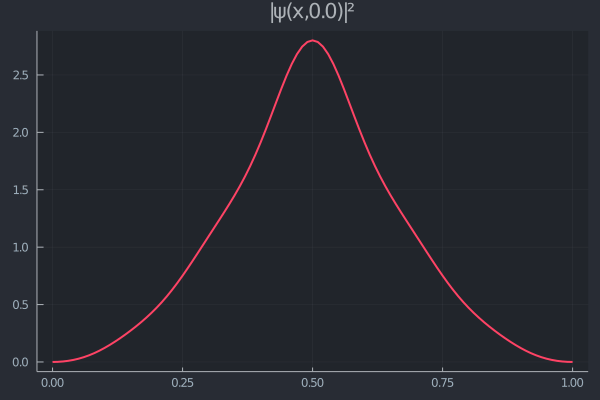

In [40]:
gr()
t = 0
function psi7(s)
    val = 0
    for m in 1:2:11
        val = sin(m*π*s)*((8*√(3)*(im)^(m-1))/(π^2*m^2))*exp(-im*2*π*m^2*t) + val
    end
    return abs2(val)
end
s = collect(0:0.01:1)
anim = @animate for i = 0:0.25/120:0.25
    t = i
    y = psi7.(s)
    plot(s,y, legend=false,ylims=[0,2.8],lw=2,title=string("|ψ(x,",round(t,sigdigits=3),")|²"))
end
gif(anim, "psi_time.gif", fps = 15)

$$c_n=\frac{4\sqrt{6}}{\pi^2n^2}\sin\left(\frac{n\pi}{2}\right)$$

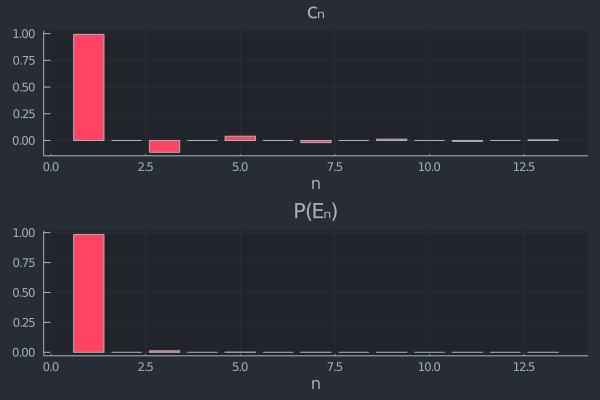

In [46]:
mmax = 13
cn = zeros(mmax)
for m in 1:mmax
    cn[m] = ((4*√(6))/(π^2*m^2))*sin(m*π/2)
end
ns = collect(1:mmax)
pcn = bar(ns,cn,title = "cₙ",xlabel="n",label=false)
pEn = bar(ns,cn.^2,title = "P(Eₙ)",xlabel="n",label=false)
plot(pcn,pEn,layout=(2,1))

#### c) What is the probability that a measurement of the energy would yield the value $E_1$?

We can calculate it from our graph values:

#### d) Find the expectation value of the energy, using Equation 2.21.

In [74]:
maxe=100000
Exe=zeros(maxe)
for m in 1:maxe
    Exe[m] = (((4*√(6))/(π^2*m^2))*sin(m*π/2))^2*(m^2*π^2)/(2)
end
print(sum(Exe))

5.999975682915929

Como vemos, el valor esperado se aproxima a 6, por lo que
$$\therefore\boxed{\langle H\rangle=\frac{6\hbar^2}{ma^2}}$$

### 2.8 A particle of mass $m$ in the infinite square well (of width $a$) starts out in the state $$\psi(x,0)=\begin{cases}A&0\displaystyle\leq x\leq \frac{a}{2}\\0&\displaystyle\frac{a}{2}\leq x\leq a\end{cases}$$ for some constant $A$, so it is (at $t=0$) equally likely to be found at any point in the left hand of the well. What is the probability that a measurement of the energy (at some later time $t$) would yield the value $\displaystyle\frac{\pi^2\hbar^2}{2ma^2}$?

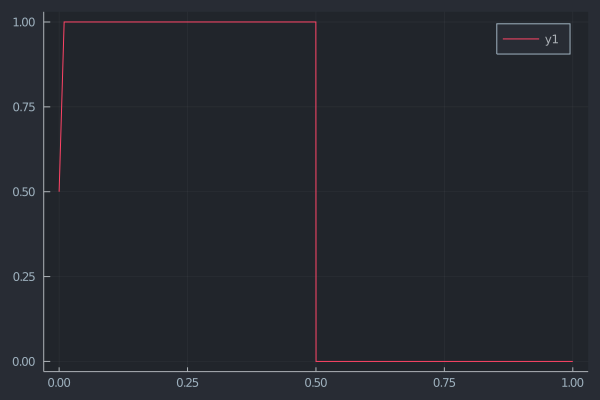

In [82]:
ψ8(x) = H(x)*H(-(x-0.5))
plot(ψ8,0,1)

First we find $A$. The integral would be
$$\int_0^{a/2}(A)^2dx=1$$
$$\Rightarrow \frac{A^2a}{2}=1$$
$$\Rightarrow A=\sqrt{\frac{2}{a}}$$
The probability that E will be $\displaystyle\frac{\pi^2\hbar^2}{2ma^2}$ is simply $\mathcal{P}(E=E_1)$. For an infinite well
$$\psi_n=\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right)$$
So we have:
$$c_1=\int_0^{a/2}\sqrt{\frac{2}{a}}\sin\left(\frac{\pi x}{a}\right)Adx$$
$$\Rightarrow c_1=\frac{2}{a}\left[-\frac{a}{\pi}\cos\left(\frac{\pi x}{a}\right)\right]_0^{a/2}$$
$$\Rightarrow c_1=\frac{2}{a}\left[-\frac{a}{\pi}\cos\left(\frac{\pi}{2}\right)+\frac{a}{\pi}\cos\left(0\right)\right]$$
$$\Rightarrow c_1=\frac{2}{a}\cdot\frac{a}{\pi}$$
$$\Rightarrow c_1=\frac{2}{\pi}$$
$$\Rightarrow c_1^2=\frac{4}{\pi^2}$$
And because $\mathcal{P}(E_1)=c_1^2$:
$$\therefore\boxed{\mathcal{P}(E_1)=\frac{4}{\pi^2}\approx0.4053}$$

### 2.9 For the wave function in Example 2.2, find the expectation value of $H$ at time $t=0$, the "old fashioned" way: $$\langle H\rangle = \int\psi(x,0)^*\hat{H}\psi(x,0)dx$$ Compare the result we got in Example 2.3.

_Note: Because $\langle H\rangle$ is independent of time, there is no loss of generality in using $t=0$._

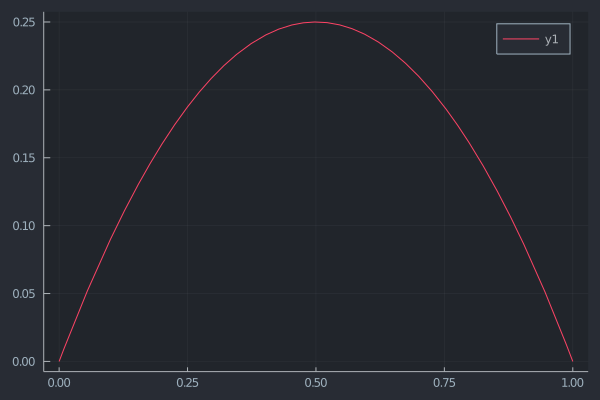

In [84]:
ψ9(x) = x*(1-x)
plot(ψ9,0,1)

First we find $A$:
$$\int_0^a|Ax(a-x)|^2dx=1$$
The function has only positive real values in that space, so:
$$A^2\int_0^a x^2(a-x)^2dx=1$$

In [85]:
A = 1/√(integrate(x^2*(a-x)^2,(x,0,a)))

  ____
\/ 30 
------
  5/2 
 a    

So we have:
$$A=\sqrt{\frac{30}{a^5}}$$
So now the function would be:
$$\psi(x,0)=\sqrt{\frac{30}{a^5}}x(a-x)^2$$
We can still use $A$ for practicality. Now to find the expected value for $H$ remembering that as an operator it's given by:
$$H=-\frac{\hbar}{2m}\frac{\partial^2}{\partial x^2}+U(x)$$
But in the well we have $U(x)=0$, so:
$$H=-\frac{\hbar}{2m}\frac{\partial^2}{\partial x^2}$$
We now write the integral:
$$\langle H\rangle=\int_0^a\left[Ax(a-x)\right]\left(-\frac{\hbar}{2m}\frac{\partial^2}{\partial x^2}\right)\left[Ax(a-x)\right]dx$$
$$\Rightarrow\langle H\rangle=-\frac{A^2\hbar}{2m}\int_0^a x(a-x)\frac{\partial^2}{\partial x^2}\left[ax-x^2\right]dx$$
$$\Rightarrow\langle H\rangle=-\frac{A^2\hbar}{2m}\int_0^a x(a-x)\frac{\partial}{\partial x}\left[a-2x\right]dx$$
$$\Rightarrow\langle H\rangle=-\frac{A^2\hbar}{2m}\int_0^a x(a-x)\left[-2\right]dx$$
$$\Rightarrow\langle H\rangle=\frac{A^2\hbar}{m}\int_0^a x(a-x)dx$$

In [86]:
integrate(x*(a-x),(x,0,a))

 3
a 
--
6 

$$\Rightarrow\langle H\rangle=\frac{A^2a^3\hbar}{6m}$$
Ahora sí sustituimos el valor de $A$
$$\Rightarrow\langle H\rangle=\frac{30a^3\hbar}{6ma^5}$$
$$\therefore\boxed{\langle H\rangle=\frac{5\hbar}{ma^2}}$$

### 2.33 Determine the transmission coefficient for a rectangular barrier. Treat separately the three cases: $E<U_0,E=U_0,U_0<E$ (note that the wave function inside the barrier is different in the three cases)

### 2.34 Consider the "step" potential. $$U(x)=\begin{cases}0&x\leq0\\U_0&0<x\end{cases}$$

#### a) Calculate the reflection coefficient, for the case $E<U_0$ and comment on the answer.

#### b) Calculate the reflection coefficient for the case $U_0<E$